In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [7]:
# Function to update the plot
def update_plot(frame):
    for i, (spacecraft, line, traj) in enumerate(zip(spacecrafts, trajectory_lines, trajectories)):
        current_frame = frame % len(traj['t'])  # Loop the animation
        spacecraft.set_data(traj['x'][current_frame], traj['y'][current_frame])
        spacecraft.set_3d_properties(traj['z'][current_frame])
        line.set_data(traj['x'][:current_frame], traj['y'][:current_frame])
        line.set_3d_properties(traj['z'][:current_frame])
    
    ax.set_title(f'Space Missions - Time: {trajectories[0]["t"][frame % len(trajectories[0]["t"])]:.2f}')
    fig.canvas.draw()

In [9]:
# Load data from multiple files
# Adjust the file names and number of files as needed
file_names = ['Earth.txt', 'Asteroid.txt', 'Venus.txt']
trajectories = []

for file in file_names:
    data = np.loadtxt(file)
    trajectories.append({
        't': data[:, 0],
        'x': data[:, 1],
        'y': data[:, 2],
        'z': data[:, 3]
    })

C:\Users\yudan\AppData\Local\Temp\ipykernel_6080\4163210950.py:24: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  spacecraft.set_data(traj['x'][current_frame], traj['y'][current_frame])


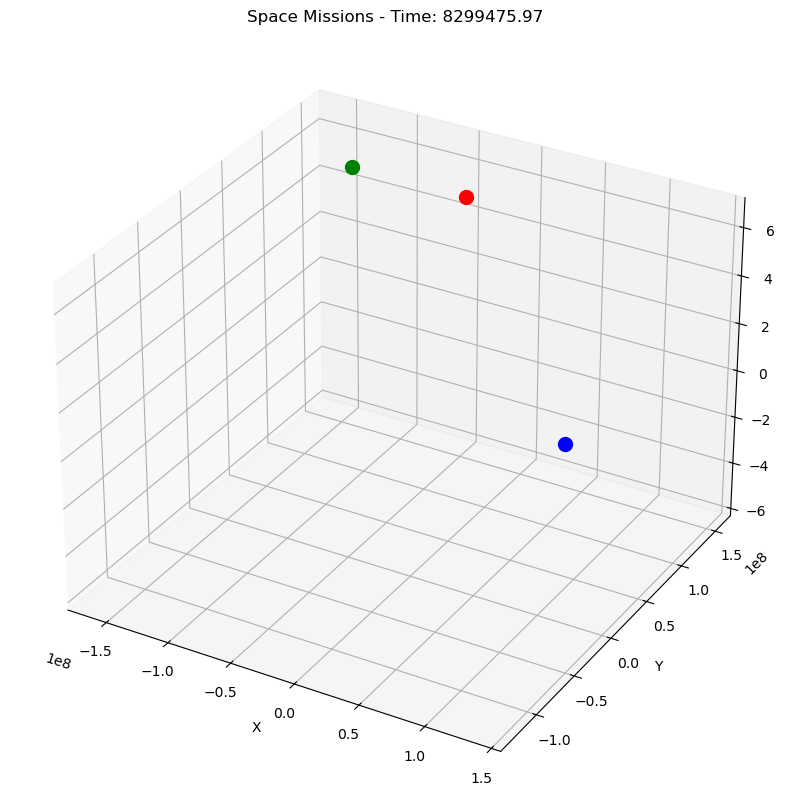

Press Enter to show next frame, 'q' to quit:  
Press Enter to show next frame, 'q' to quit:  
Press Enter to show next frame, 'q' to quit:  q


In [11]:
# Set up the figure and 3D axis
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Set axis limits (adjust as needed based on your data)
ax.set_xlim(min(traj['x'].min() for traj in trajectories), max(traj['x'].max() for traj in trajectories))
ax.set_ylim(min(traj['y'].min() for traj in trajectories), max(traj['y'].max() for traj in trajectories))
ax.set_zlim(min(traj['z'].min() for traj in trajectories), max(traj['z'].max() for traj in trajectories))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.grid(True)

# Initialize plot objects
colors = ['r', 'g', 'b', 'c', 'm', 'y']  # Add more colors if needed
spacecrafts = [ax.plot([], [], [], f'{c}o', markersize=10, markerfacecolor=c)[0] for c in colors[:len(trajectories)]]
trajectory_lines = [ax.plot([], [], [], f'{c}-', linewidth=2)[0] for c in colors[:len(trajectories)]]

# Function to update the plot
def update_plot(frame):
    for i, (spacecraft, line, traj) in enumerate(zip(spacecrafts, trajectory_lines, trajectories)):
        current_frame = frame % len(traj['t'])  # Loop the animation
        spacecraft.set_data(traj['x'][current_frame], traj['y'][current_frame])
        spacecraft.set_3d_properties(traj['z'][current_frame])
        line.set_data(traj['x'][:current_frame], traj['y'][:current_frame])
        line.set_3d_properties(traj['z'][:current_frame])
    
    ax.set_title(f'Space Missions - Time: {trajectories[0]["t"][frame % len(trajectories[0]["t"])]:.2f}')
    fig.canvas.draw()

# Maximum number of frames
max_frames = max(len(traj['t']) for traj in trajectories)

# Initial plot
update_plot(0)
plt.show(block=False)

# Main loop
frame = 0
while True:
    user_input = input("Press Enter to show next frame, 'q' to quit: ")
    if user_input.lower() == 'q':
        break
    frame = (frame + 1) % max_frames
    update_plot(frame)

plt.close(fig)